In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
def plot(image):
    plt.figure(figsize=(8,8))
    if len(image.shape)==2 or image.shape[-1]==1:
        plt.imshow(image, cmap="gray")
    else:
        plt.imshow(image)
    plt.show()
        

In [3]:
read = lambda x: cv2.imread(x)[:,:,::-1]
resize = lambda x, y: cv2.resize(x, (0,0), fx=y, fy=y)
gray = lambda x: cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)

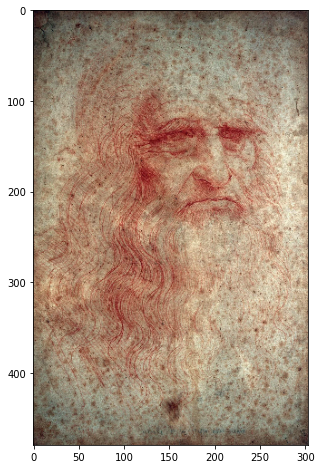

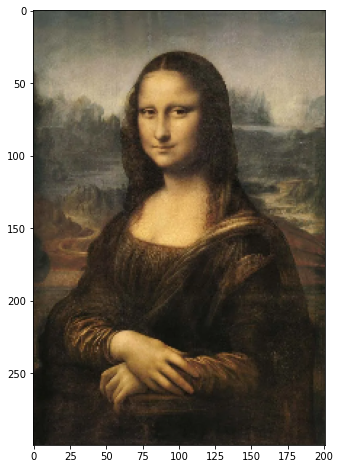

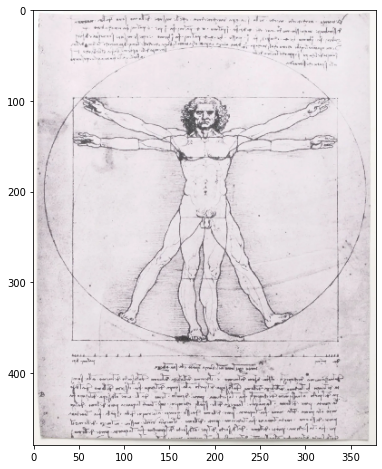

In [30]:
images = glob.glob("./Data/*")
for image in images:
    image = read(image)
    image = resize(image, .3)
    plot(image)

In [8]:
def convolve(image, kernel):
    '''Perform 2D convolution on single channel image'''
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape[:2]
    filter_applied = []
    row_loop = image_height - kernel_height + 1
    row_itr = 0
    while row_itr<row_loop:
        filter_row = []
        col_loop = image_width - kernel_width + 1
        col_itr = 0
        while col_itr<col_loop: 
            image_patch = image[row_itr:row_itr+kernel_height, col_itr:col_itr+kernel_width]
            new_pixel = np.sum(np.multiply(image_patch, kernel))
            filter_row.append(new_pixel)
            col_itr += 1
        filter_applied.append(filter_row)
        row_itr += 1
    return np.array(filter_applied)

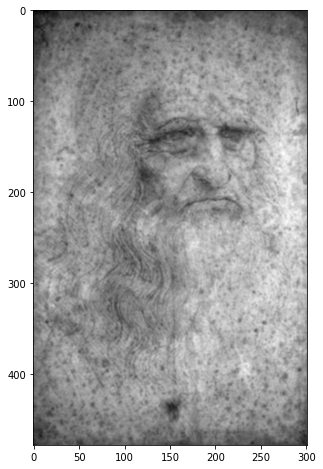

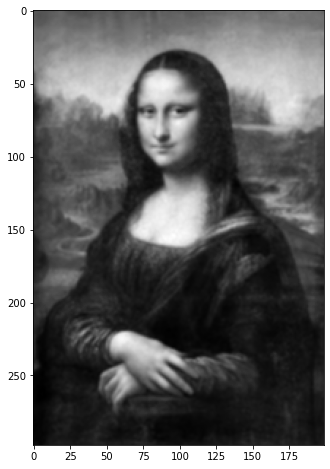

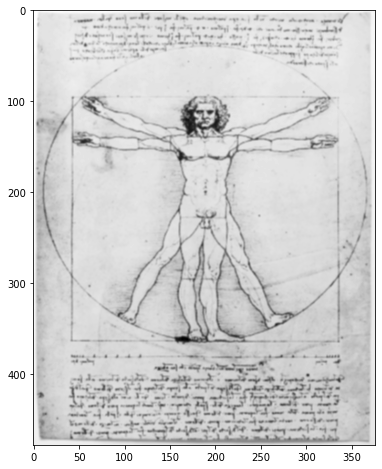

In [15]:
gausian_kernel = np.array(
    [
        [1,2,1],
        [2,4,2],
        [1,2,1],
    ]
)

images = glob.glob("./Data/*")
# Applying gausian blur
for image in images:
    image = read(image)
    image = resize(image, .3)
    gray_image = gray(image)
    conv = convolve(gray_image, gausian_kernel)
    plot(conv)

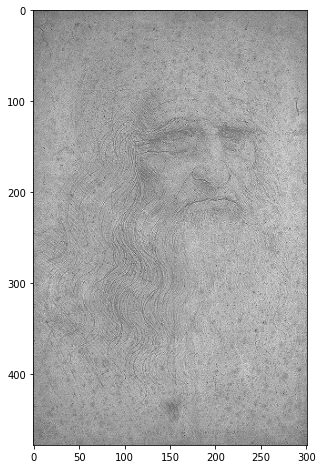

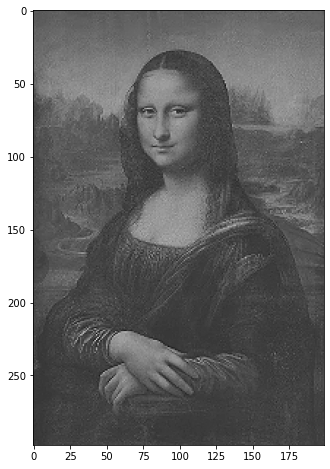

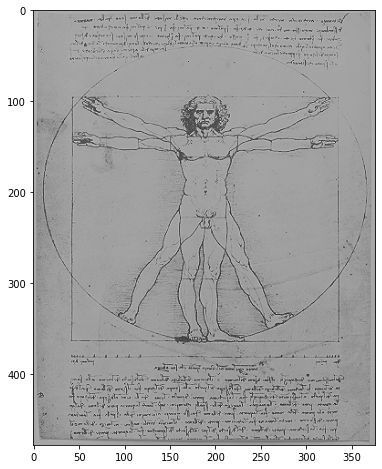

In [25]:
sharp_kernel = np.array(
   [
       [  0 , -.5 ,   0 ],
       [-.5 ,   3 , -.5 ],
       [  0 , -.5 ,   0 ]
   ]
)

images = glob.glob("./Data/*")
# Applying sharp filter
for image in images:
    image = read(image)
    image = resize(image, .3)
    gray_image = gray(image)
    conv = convolve(gray_image, sharp_kernel)
    plot(conv)

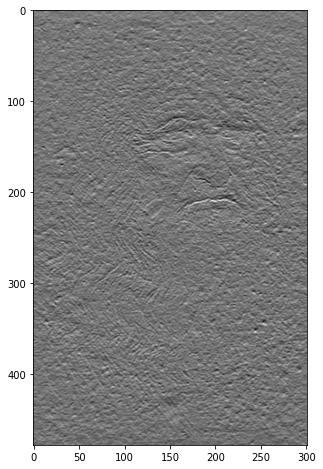

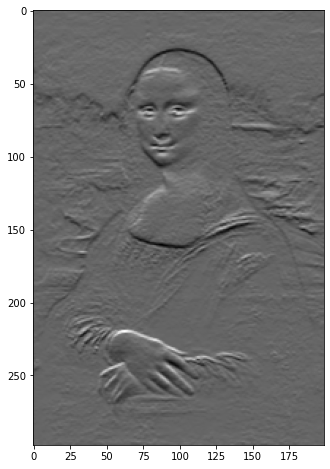

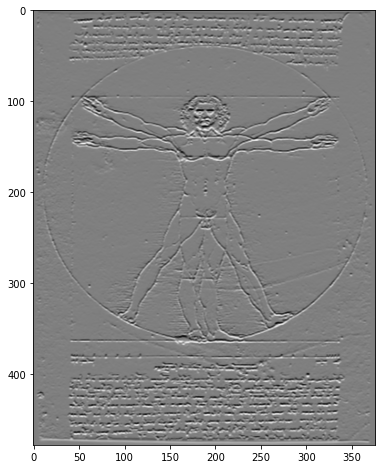

In [26]:
horizontal_kernel = np.array(
   [
       [-1, -2, -1],
       [0, 0, 0],
       [1, 2, 1]
   ]
)

images = glob.glob("./Data/*")
# Applying Horizontal edge
for image in images:
    image = read(image)
    image = resize(image, .3)
    gray_image = gray(image)
    conv = convolve(gray_image, horizontal_kernel)
    plot(conv)

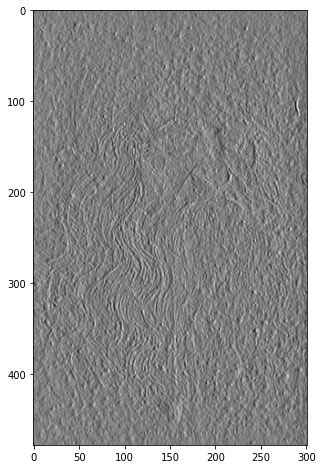

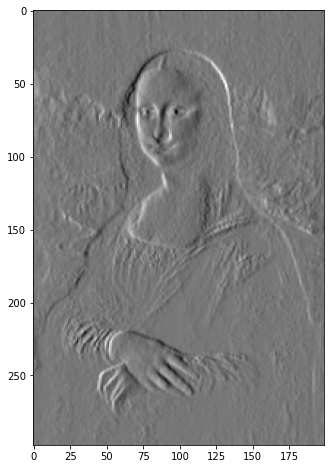

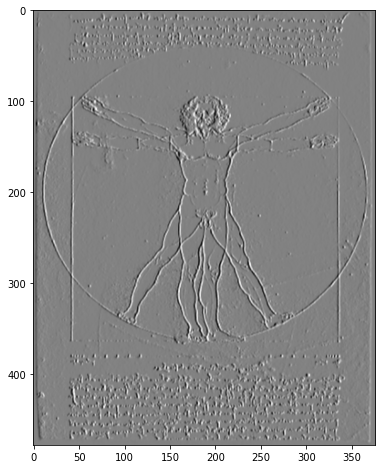

In [28]:
vertical_kernel = np.array(
    [
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ]
)

images = glob.glob("./Data/*")
# Applying vertical edge
for image in images:
    image = read(image)
    image = resize(image, .3)
    gray_image = gray(image)
    conv = convolve(gray_image, vertical_kernel)
    plot(conv)

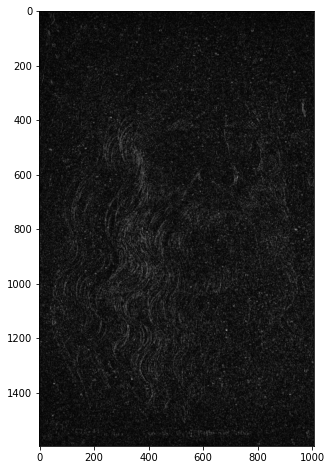

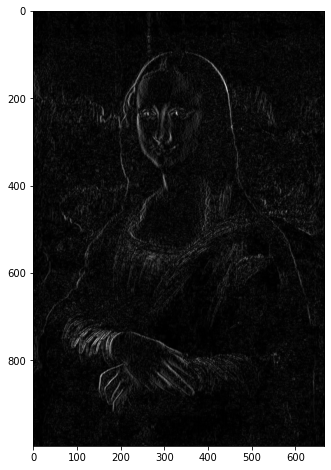

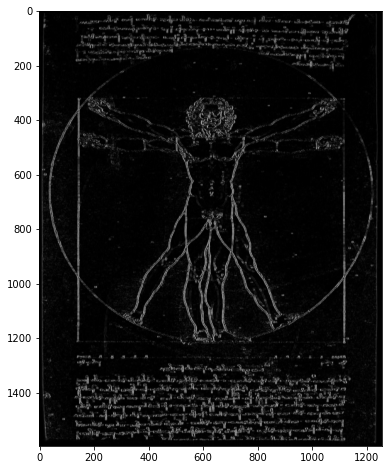

In [51]:
# Sobel edge

images = glob.glob("./Data/*")
for image in images:
    image = read(image)
    image = resize(image, 1)
    gray_image = gray(image)
    blur = convolve(gray_image, gausian_kernel)
    v_conv = convolve(blur, vertical_kernel)
    h_conv = convolve(blur, horizontal_kernel)
    conv = np.sqrt(np.add(v_conv**2, v_conv**2))
    plot(conv)